# Evaluate the influence of different parameters on the epsilon-PAL performance

In [176]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
from pathlib import Path
import os
from glob import glob 


reference_hv = 1535
OUTPUTS_DIR = '../work/parameter_sweep/'

In [45]:
all_experiments = pd.read_csv('../work/parameter_sweep/all_experiments.csv')

In [3]:
all_experiments

,counter,n_samples,epsilon,beta_scale,delta
0,0,10,0.0,1.000000,0.01
1,1,10,0.0,1.000000,0.05
2,2,10,0.0,0.333333,0.01
3,3,10,0.0,0.333333,0.05
4,4,10,0.0,0.111111,0.01
...,...,...,...,...,...
187,187,200,0.1,0.333333,0.05
188,188,200,0.1,0.111111,0.01
189,189,200,0.1,0.111111,0.05
190,190,200,0.1,0.050000,0.01


The structure of the filenames is 

datettimeepsilon_delta__beta_scale_n_samples

I unfortunately, forgot to put an underscore between the datetime and the epsilon 

In [182]:
def split_name(path): 
    stem = Path(path).stem 
    parts0 = stem.split('-')
    date = parts0[0]
    data = parts0[2]
    
    parts1 = parts0[1].split('_')
    time = parts1[0][:6]
    epsilon = float(parts1[0][6:])
    delta = float(parts1[1])
    betascale = float(parts1[2])
    nsamples = int(parts1[3])
    
    
    if 'hypervolumes' in stem:
        hvs = np.load(file)[0]
    else: 
        hvs = [np.nan] 
        
        
    return { 
        'path': path, 
        'stem': stem, 
        'date': date, 
        'data': data,
        'time': time, 
        'n_iter': len(hvs),
        'delta': delta, 
        'epsilon': epsilon, 
        'final_hypervolume': hvs[-1], 
        'hypervolumes': hvs,
        'betascale': betascale, 
        'nsamples': nsamples,
        'historyname': date + '-' + time + '-' + 'history.pkl'
    }

In [183]:
all_files = glob('../work/parameter_sweep/*.pkl') + glob('../work/parameter_sweep/*.joblib') +  glob('../work/parameter_sweep/*.npy')

In [184]:
all_file_contents = []

for file in all_files: 
    try:
        all_file_contents.append(split_name(file))
    except Exception as e: 
        print(e, file)

could not convert string to float:  ../work/parameter_sweep/20200903-193729-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200903-231343-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200905-021239-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200903-195317-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200903-205656-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200903-184231-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200904-035510-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200904-185217-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200904-052148-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200904-131242-history.pkl
could not convert string to float:  ../work/parameter_sweep/20200904-121945-history.pkl
could not convert string to floa

In [190]:
all_file_contents_df = pd.DataFrame(all_file_contents)

In [191]:
all_file_contents_df

,path,stem,date,data,time,n_iter,delta,epsilon,final_hypervolume,hypervolumes,betascale,nsamples,historyname
0,../work/parameter_sweep/20200904-1046240.0_0.0...,20200904-1046240.0_0.05_0.05_60-models,20200904,models,104624,1,0.05,0.00,NaN,[nan],0.050000,60,20200904-104624-history.pkl
1,../work/parameter_sweep/20200904-1340590.05_0....,20200904-1340590.05_0.05_0.05_60-models,20200904,models,134059,1,0.05,0.05,NaN,[nan],0.050000,60,20200904-134059-history.pkl
2,../work/parameter_sweep/20200904-1221560.01_0....,20200904-1221560.01_0.01_0.05_60-models,20200904,models,122156,1,0.01,0.01,NaN,[nan],0.050000,60,20200904-122156-history.pkl
3,../work/parameter_sweep/20200903-1229560.05_0....,20200903-1229560.05_0.01_0.1111111111111111_10...,20200903,models,122956,1,0.01,0.05,NaN,[nan],0.111111,10,20200903-122956-history.pkl
4,../work/parameter_sweep/20200903-1430080.0_0.0...,20200903-1430080.0_0.01_0.1111111111111111_20-...,20200903,models,143008,1,0.01,0.00,NaN,[nan],0.111111,20,20200903-143008-history.pkl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,../work/parameter_sweep/20200904-2209350.01_0....,20200904-2209350.01_0.01_0.05_200-selected,20200904,selected,220935,1,0.01,0.01,NaN,[nan],0.050000,200,20200904-220935-history.pkl
764,../work/parameter_sweep/20200903-2148270.0_0.0...,20200903-2148270.0_0.05_0.05_40-X_test,20200903,X_test,214827,1,0.05,0.00,NaN,[nan],0.050000,40,20200903-214827-history.pkl
765,../work/parameter_sweep/20200904-0347110.05_0....,20200904-0347110.05_0.05_0.1111111111111111_40...,20200904,X_train,034711,1,0.05,0.05,NaN,[nan],0.111111,40,20200904-034711-history.pkl
766,../work/parameter_sweep/20200903-2148270.0_0.0...,20200903-2148270.0_0.05_0.05_40-y_test,20200903,y_test,214827,1,0.05,0.00,NaN,[nan],0.050000,40,20200903-214827-history.pkl


In [192]:
beta_scales = all_file_contents_df[all_file_contents_df['nsamples'] == 100]['betascale'].unique()

In [195]:
eps0_beta_smallest= all_file_contents_df[(~all_file_contents_df['final_hypervolume'].isna()) &
                     (all_file_contents_df['epsilon'] == 0.0)& 
                    (all_file_contents_df['betascale'] == 0.05)
                    ].sort_values(by='final_hypervolume')


eps0_beta_small = all_file_contents_df[(~all_file_contents_df['final_hypervolume'].isna()) &
                     (all_file_contents_df['epsilon'] == 0.01)& 
                    (all_file_contents_df['betascale'] == 0.05)
                    ].sort_values(by='final_hypervolume')

eps0_beta_default = all_file_contents_df[(~all_file_contents_df['final_hypervolume'].isna()) &
                     (all_file_contents_df['epsilon'] == 0.05)& 
                    (all_file_contents_df['betascale'] == 0.05)
                    ].sort_values(by='final_hypervolume')

In [196]:
eps0_beta_smallest_delta_small = eps0_beta_smallest[eps0_beta_smallest['delta'] == 0.01]
eps0_beta_smallest_delta_large = eps0_beta_smallest[eps0_beta_smallest['delta'] == 0.05]


eps0_beta_small_delta_small = eps0_beta_small[eps0_beta_small['delta'] == 0.01]
eps0_beta_small_delta_large = eps0_beta_small[eps0_beta_small['delta'] == 0.05]


eps0_beta_default_delta_small = eps0_beta_default[eps0_beta_default['delta'] == 0.01]
eps0_beta_default_delta_large = eps0_beta_default[eps0_beta_default['delta'] == 0.05]

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


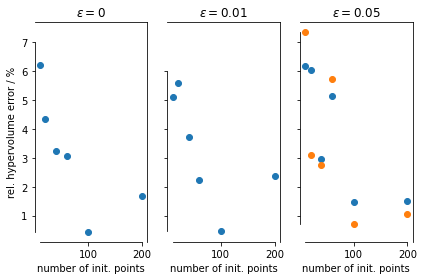

In [242]:
fig, ax = plt.subplots(1,3, sharey='row')


ax[0].scatter(eps0_beta_smallest_delta_small['nsamples'], (reference_hv - eps0_beta_smallest_delta_small['final_hypervolume'])/reference_hv * 100, label=r'$\delta=0.01$')
#ax[0].scatter(eps0_beta_smallest_delta_large['nsamples'], eps0_beta_smallest_delta_large['final_hypervolume'], label=r'$\delta=0.05$')

ax[1].scatter(eps0_beta_small_delta_small['nsamples'], (reference_hv - eps0_beta_small_delta_small['final_hypervolume'])/reference_hv * 100, label=r'$\delta=0.01$')
#ax[1].scatter(eps0_beta_small_delta_large['nsamples'], eps0_beta_small_delta_large['final_hypervolume'], label=r'$\delta=0.05$')

ax[2].scatter(eps0_beta_default_delta_small['nsamples'], (reference_hv - eps0_beta_default_delta_small['final_hypervolume'])/reference_hv * 100, label=r'$\delta=0.01$')
ax[2].scatter(eps0_beta_default_delta_large['nsamples'], (reference_hv - eps0_beta_default_delta_large['final_hypervolume'])/reference_hv * 100, label=r'$\delta=0.05$')

ax[0].set_title(r'$\epsilon=0$')
ax[1].set_title(r'$\epsilon=0.01$')
ax[2].set_title(r'$\epsilon=0.05$')

for a in ax: 
    a.set_xlabel('number of init. points')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

#ax[0].legend()
ax[0].set_ylabel('rel. hypervolume error / %')

fig.tight_layout()

fig.savefig('fixed_epsilon_delta_varying_init_points.pdf', bbox_inches='tight')

In [207]:
beta_small_100_samples = all_file_contents_df[(~all_file_contents_df['final_hypervolume'].isna()) &
                     (all_file_contents_df['nsamples'] == 100) & 
                    (all_file_contents_df['betascale'] == 0.05)
                    ].sort_values(by='final_hypervolume')


beta_medium_100_samples = all_file_contents_df[(~all_file_contents_df['final_hypervolume'].isna()) &
                     (all_file_contents_df['nsamples'] == 100) & 
                    (all_file_contents_df['betascale'] == beta_scales[1])
                    ].sort_values(by='final_hypervolume')


beta_large_100_samples = all_file_contents_df[(~all_file_contents_df['final_hypervolume'].isna()) &
                     (all_file_contents_df['nsamples'] == 100) & 
                    (all_file_contents_df['betascale'] == 0.33333333)
                    ].sort_values(by='final_hypervolume')

In [208]:
beta_small_100_samples_delta_small = beta_small_100_samples[beta_small_100_samples['delta'] == 0.01]
beta_small_100_samples_delta_large = beta_small_100_samples[beta_small_100_samples['delta'] == 0.05]

beta_medium_100_samples_delta_small = beta_medium_100_samples[beta_medium_100_samples['delta'] == 0.01]
beta_medium_100_samples_delta_large = beta_medium_100_samples[beta_medium_100_samples['delta'] == 0.05]

beta_large_100_samples_delta_small = beta_large_100_samples[beta_large_100_samples['delta'] == 0.01]
beta_large_100_samples_delta_large = beta_large_100_samples[beta_large_100_samples['delta'] == 0.05]


In [209]:
beta_medium_100_samples

,path,stem,date,data,time,n_iter,delta,epsilon,final_hypervolume,hypervolumes,betascale,nsamples,historyname
693,../work/parameter_sweep/20200904-1730290.05_0....,20200904-1730290.05_0.05_0.1111111111111111_10...,20200904,hypervolumes,173029,263,0.05,0.05,1486.358212,"[1066.6891474489894, 1066.6891474489894, 1066....",0.111111,100,20200904-173029-history.pkl
688,../work/parameter_sweep/20200904-1644550.01_0....,20200904-1644550.01_0.01_0.1111111111111111_10...,20200904,hypervolumes,164455,473,0.01,0.01,1493.216188,"[1066.6891474489894, 1066.6891474489894, 1066....",0.111111,100,20200904-164455-history.pkl
512,../work/parameter_sweep/20200904-1511290.0_0.0...,20200904-1511290.0_0.05_0.1111111111111111_100...,20200904,hypervolumes,151129,498,0.05,0.00,1494.024056,"[1066.6891474489894, 1066.6891474489894, 1066....",0.111111,100,20200904-151129-history.pkl
406,../work/parameter_sweep/20200904-1429110.0_0.0...,20200904-1429110.0_0.01_0.1111111111111111_100...,20200904,hypervolumes,142911,560,0.01,0.00,1494.152905,"[1066.6891474489894, 1066.6891474489894, 1066....",0.111111,100,20200904-142911-history.pkl
372,../work/parameter_sweep/20200904-1646480.01_0....,20200904-1646480.01_0.05_0.1111111111111111_10...,20200904,hypervolumes,164648,391,0.05,0.01,1511.636023,"[1066.6891474489894, 1066.6891474489894, 1066....",0.111111,100,20200904-164648-history.pkl
296,../work/parameter_sweep/20200904-1852170.1_0.0...,20200904-1852170.1_0.05_0.1111111111111111_100...,20200904,hypervolumes,185217,138,0.05,0.10,1514.244851,"[1320.061836065537, 1320.061836065537, 1320.06...",0.111111,100,20200904-185217-history.pkl
450,../work/parameter_sweep/20200904-1728500.05_0....,20200904-1728500.05_0.01_0.1111111111111111_10...,20200904,hypervolumes,172850,235,0.01,0.05,1516.266291,"[1066.6891474489894, 1066.6891474489894, 1066....",0.111111,100,20200904-172850-history.pkl
675,../work/parameter_sweep/20200904-1840350.1_0.0...,20200904-1840350.1_0.01_0.1111111111111111_100...,20200904,hypervolumes,184035,155,0.01,0.10,1519.283611,"[1312.107165346657, 1320.061836065537, 1320.06...",0.111111,100,20200904-184035-history.pkl


Text(0.5, 1.0, '100 initial points, $\\beta_\\mathrm{scale}=0.05$')

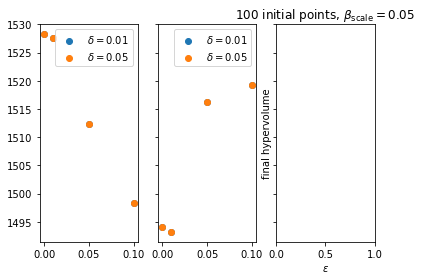

In [210]:
fig, ax = plt.subplots(1,3, sharey='row')

ax[0].scatter(beta_small_100_samples_delta_small['epsilon'], beta_small_100_samples_delta_small['final_hypervolume'], label=r'$\delta=0.01$')
ax[0].scatter(beta_small_100_samples_delta_small['epsilon'], beta_small_100_samples_delta_small['final_hypervolume'], label=r'$\delta=0.05$')
ax[0].legend()

ax[1].scatter(beta_medium_100_samples_delta_small['epsilon'], beta_medium_100_samples_delta_small['final_hypervolume'], label=r'$\delta=0.01$')
ax[1].scatter(beta_medium_100_samples_delta_small['epsilon'], beta_medium_100_samples_delta_small['final_hypervolume'], label=r'$\delta=0.05$')
ax[1].legend()



plt.xlabel(r'$\epsilon$')
plt.ylabel('final hypervolume')
plt.title(r'100 initial points, $\beta_\mathrm{scale}=0.05$')


/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if sys.path[0] == '':
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]


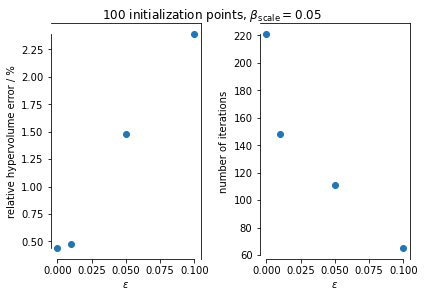

In [234]:
fig, ax = plt.subplots(1,2, sharex='row')

ax[0].scatter(beta_small_100_samples_delta_small['epsilon'], (reference_hv - beta_small_100_samples_delta_small['final_hypervolume'])/reference_hv * 100, label=r'$\delta=0.01$')
#ax[0].scatter(beta_small_100_samples_delta_large['epsilon'], (reference_hv - beta_small_100_samples_delta_large['final_hypervolume'])/reference_hv * 100, label=r'$\delta=0.05$', alpha=.5)


ax[1].scatter(beta_small_100_samples_delta_small['epsilon'], beta_small_100_samples_delta_small['n_iter'], label=r'$\delta=0.01$')
#ax[1].scatter(beta_small_100_samples_delta_large['epsilon'], beta_small_100_samples_delta_large['n_iter'], label=r'$\delta=0.05$', alpha=.5)


for a in ax: 
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

fig.suptitle(r'100 initialization points, $\beta_\mathrm{scale}=0.05$', y=1.02)



ax[0].set_xlabel(r'$\epsilon$')
ax[0].set_ylabel('relative hypervolume error / %')

ax[1].set_xlabel(r'$\epsilon$')
ax[1].set_ylabel('number of iterations')
†over

fig.tight_layout()

fig.savefig('hv_n_iter_as_function_of_epsilon.pdf', bbox_inches='tight')

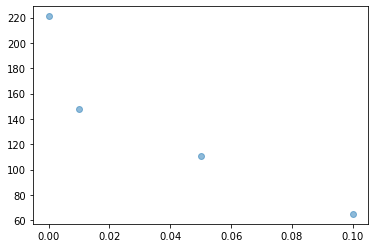

In [217]:

ax.scatter(beta_small_100_samples_delta_small['epsilon'], beta_small_100_samples_delta_small['n_iter'], label=r'$\delta=0.01$', alpha=.5)
ax.scatter(beta_large_100_samples_delta_small['epsilon'],   beta_large_100_samples_delta_small['n_iter'], label=r'$\delta=0.05$', alpha=.5)


In [214]:
beta_small_100_samples_delta_small

,path,stem,date,data,time,n_iter,delta,epsilon,final_hypervolume,hypervolumes,betascale,nsamples,historyname
550,../work/parameter_sweep/20200904-1855210.1_0.0...,20200904-1855210.1_0.01_0.05_100-hypervolumes,20200904,hypervolumes,185521,65,0.01,0.10,1498.350469,"[1399.3310608280874, 1425.564695570882, 1453.2...",0.05,100,20200904-185521-history.pkl
580,../work/parameter_sweep/20200904-1742060.05_0....,20200904-1742060.05_0.01_0.05_100-hypervolumes,20200904,hypervolumes,174206,111,0.01,0.05,1512.315966,"[1023.9408320323523, 1023.9408320323523, 1023....",0.05,100,20200904-174206-history.pkl
423,../work/parameter_sweep/20200904-1652490.01_0....,20200904-1652490.01_0.01_0.05_100-hypervolumes,20200904,hypervolumes,165249,148,0.01,0.01,1527.625186,"[1023.9408320323523, 1023.9408320323523, 1023....",0.05,100,20200904-165249-history.pkl
376,../work/parameter_sweep/20200904-1511320.0_0.0...,20200904-1511320.0_0.01_0.05_100-hypervolumes,20200904,hypervolumes,151132,221,0.01,0.00,1528.251574,"[1023.9408320323523, 1023.9408320323523, 1023....",0.05,100,20200904-151132-history.pkl
